In [2]:
library(corrplot)
mydata = read.csv('diabetes.csv')

corrplot 0.84 loaded



In [3]:
# view the first few rows of the data
print(head(mydata))

  Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1           6     148            72            35       0 33.6
2           1      85            66            29       0 26.6
3           8     183            64             0       0 23.3
4           1      89            66            23      94 28.1
5           0     137            40            35     168 43.1
6           5     116            74             0       0 25.6
  DiabetesPedigreeFunction Age Outcome
1                    0.627  50       1
2                    0.351  31       0
3                    0.672  32       1
4                    0.167  21       0
5                    2.288  33       1
6                    0.201  30       0


In [4]:
print(tail(mydata))

    Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
763           9      89            62             0       0 22.5
764          10     101            76            48     180 32.9
765           2     122            70            27       0 36.8
766           5     121            72            23     112 26.2
767           1     126            60             0       0 30.1
768           1      93            70            31       0 30.4
    DiabetesPedigreeFunction Age Outcome
763                    0.142  33       0
764                    0.171  63       0
765                    0.340  27       0
766                    0.245  30       0
767                    0.349  47       1
768                    0.315  23       0


In [5]:
print(summary(mydata))

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [6]:
print(str(data))

function (..., list = character(), package = NULL, lib.loc = NULL, verbose = getOption("verbose"), 
    envir = .GlobalEnv, overwrite = TRUE)  
NULL


In [7]:
print(paste('cols:', ncol(mydata)))
print(paste('rows:', nrow(mydata)))

[1] "cols: 9"
[1] "rows: 768"


In [8]:
# check missing value
install.packages("Amelia")
library(Amelia)

Installing package into 'C:/Users/habiw/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\habiw\AppData\Local\Temp\Rtmp8WT0gW\downloaded_packages


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



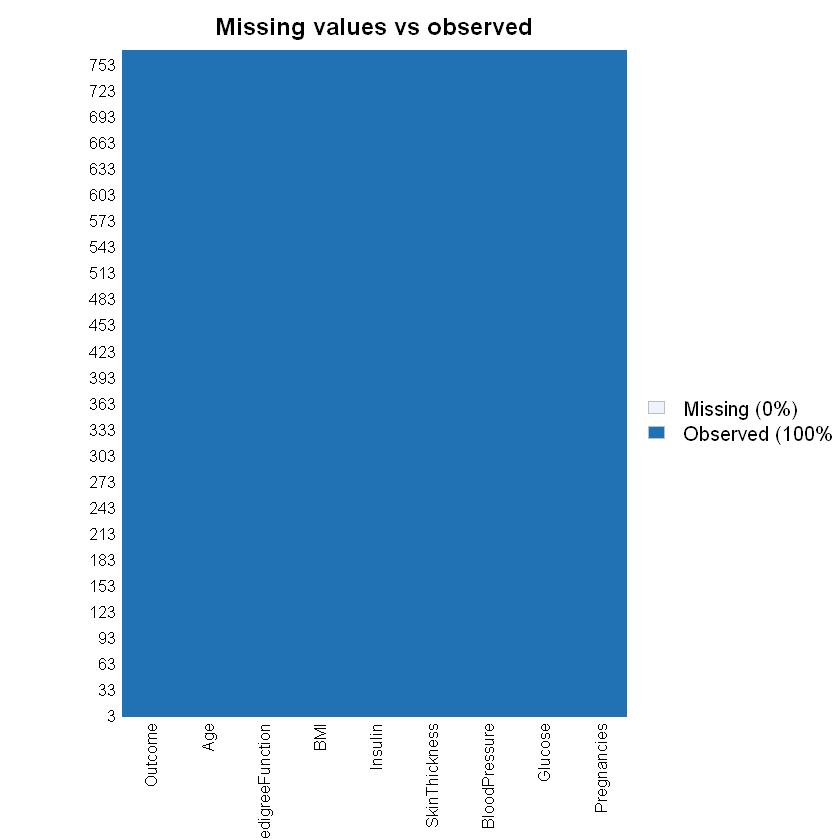

In [9]:
missmap(mydata, main='Missing values vs observed')
# => no missing values

In [10]:
# Check Class bias
print(table(mydata$Outcome))


  0   1 
500 268 


In [11]:
# BoxPlot to check for outliers
# Drop rows having outliers

# calculating the correlation between each pair of numeric variables
correlations = cor(mydata[,1:9])
print(correlations)

                         Pregnancies    Glucose BloodPressure SkinThickness
Pregnancies               1.00000000 0.12945867    0.14128198   -0.08167177
Glucose                   0.12945867 1.00000000    0.15258959    0.05732789
BloodPressure             0.14128198 0.15258959    1.00000000    0.20737054
SkinThickness            -0.08167177 0.05732789    0.20737054    1.00000000
Insulin                  -0.07353461 0.33135711    0.08893338    0.43678257
BMI                       0.01768309 0.22107107    0.28180529    0.39257320
DiabetesPedigreeFunction -0.03352267 0.13733730    0.04126495    0.18392757
Age                       0.54434123 0.26351432    0.23952795   -0.11397026
Outcome                   0.22189815 0.46658140    0.06506836    0.07475223
                             Insulin        BMI DiabetesPedigreeFunction
Pregnancies              -0.07353461 0.01768309              -0.03352267
Glucose                   0.33135711 0.22107107               0.13733730
BloodPressure        

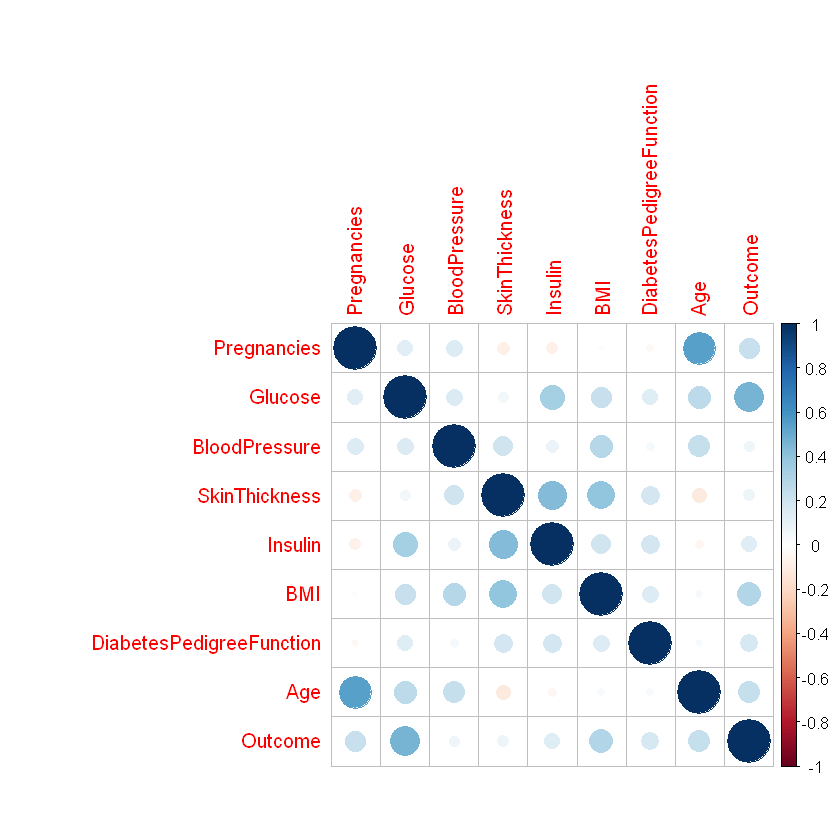

In [12]:
corrplot(correlations, method='circle')

In [13]:
# divided into train and test: 70 - 30
n = nrow(mydata)
trainIndex = sample(1:n, size=round(0.7*n), replace=FALSE)
train = mydata[trainIndex ,]
test = mydata[-trainIndex ,]
print('Rows of training data and test data:')
print(nrow(train))
print(nrow(test))

[1] "Rows of training data and test data:"
[1] 538
[1] 230


In [14]:
# estimates a logistic regression model using the glm (generalized linear model)
mylogit = glm(Outcome ~ ., data = train, family = 'binomial')
print(summary(mylogit))


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4127  -0.7156  -0.4221   0.7677   2.7395  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.323358   0.841446  -9.892  < 2e-16 ***
Pregnancies               0.092071   0.038458   2.394   0.0167 *  
Glucose                   0.031998   0.004314   7.416 1.20e-13 ***
BloodPressure            -0.012276   0.006036  -2.034   0.0420 *  
SkinThickness             0.004297   0.008506   0.505   0.6135    
Insulin                  -0.001007   0.001096  -0.919   0.3582    
BMI                       0.095216   0.017953   5.304 1.14e-07 ***
DiabetesPedigreeFunction  0.703294   0.351321   2.002   0.0453 *  
Age                       0.022480   0.011886   1.891   0.0586 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

In [15]:
pred = predict(mylogit, 
               newdata = test,
              type = 'response')

pred_value = ifelse(pred > 0.5, 1, 0)
print('Testdata admit vs predict (10 rows):')
result = data.frame(testAdmit = test$Outcome[30:40], pred_value[30:40])
print(result)

[1] "Testdata admit vs predict (10 rows):"
    testAdmit pred_value.30.40.
100         1                 1
102         0                 0
105         0                 0
107         0                 0
115         1                 1
116         1                 1
117         1                 0
118         0                 0
121         1                 1
124         0                 0
129         1                 0


In [16]:
print(pred_value[30:40])
print(test$Outcome[30:40])

100 102 105 107 115 116 117 118 121 124 129 
  1   0   0   0   1   1   0   0   1   0   0 
 [1] 1 0 0 0 1 1 1 0 1 0 1


In [17]:
# solution 1
accuracy = table(pred_value, test[, 'Outcome'])
accuracy = sum(diag(accuracy))/sum(accuracy)
print(paste('Accuracy s1:', accuracy))

[1] "Accuracy s1: 0.795652173913043"


In [18]:
# solution 2
misClasificError = mean(pred_value != test$Outcome)
print(paste('Accuracy s2:', 1-misClasificError))

[1] "Accuracy s2: 0.795652173913043"


In [19]:
summary(mylogit)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4127  -0.7156  -0.4221   0.7677   2.7395  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.323358   0.841446  -9.892  < 2e-16 ***
Pregnancies               0.092071   0.038458   2.394   0.0167 *  
Glucose                   0.031998   0.004314   7.416 1.20e-13 ***
BloodPressure            -0.012276   0.006036  -2.034   0.0420 *  
SkinThickness             0.004297   0.008506   0.505   0.6135    
Insulin                  -0.001007   0.001096  -0.919   0.3582    
BMI                       0.095216   0.017953   5.304 1.14e-07 ***
DiabetesPedigreeFunction  0.703294   0.351321   2.002   0.0453 *  
Age                       0.022480   0.011886   1.891   0.0586 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

In [20]:
# make new prediction
# 8, 176, 90, 34, 300, 33.7, 0.467, 58
# 1, 100, 66, 15, 56, 23.6, 0.666, 26
# 12, 88, 74, 40, 54, 35.3, 0.378, 48
print(colnames(test))
y1 = predict(mylogit, 
             newdata = data.frame(Pregnancies = c(8, 1, 12),
                                  Glucose = c(176, 100, 88), 
                                  BloodPressure = c(90, 66, 74),
                                  SkinThickness = c(34, 15, 40),
                                  Insulin = c(300, 56, 54), 
                                  BMI = c(33.7, 23.6, 35.3), 
                                  DiabetesPedigreeFunction = c(0.467, 0.666, 0.378),
                                  Age = c(58, 26, 48)),
            type = 'response')
y1 = ifelse(y1 > 0.5, 1, 0)
print('results:')
print(y1)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 
[1] "results:"
1 2 3 
1 0 0 
